In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


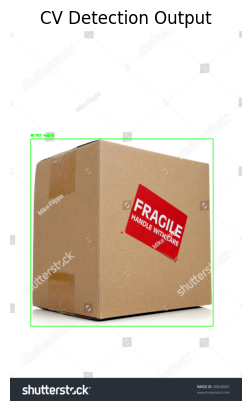

Objects Info: [{'top_left': (89, 466), 'width': 787, 'height': 810, 'center': (482, 871)}]
Predicted Class: fragile
RAG Response: Fragile items should not be stacked more than two high.


In [7]:
#Integration code (simplified - no ml_classification import)
import sys
import os
import cv2
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms
from torchvision.models import resnet50
import torch.nn as nn

ROOT = "/content/drive/MyDrive/warehouse_ai"  # CHANGE THIS ONLY

sys.path.append(os.path.join(ROOT, "cv_module"))
sys.path.append(os.path.join(ROOT, "RAG_module"))

from cv_detection import detect_objects
from RAG import load_kb, retrieve_answer

# Load saved model directly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = resnet50(weights=None)
model.fc = nn.Linear(2048, 3)
model_path = os.path.join(ROOT, "ml_module", "resnet50_warehouse.pth")
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

# Get class names from dataset folder
data_path = os.path.join(ROOT, "ml_module", "dataset")
class_names = sorted([d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))])

# Use same transform as training
from torchvision.models import ResNet50_Weights
weights = ResNet50_Weights.DEFAULT
transform = weights.transforms()

# CV Detection
img_path = os.path.join(ROOT,  "ml_module", "dataset", "fragile", "000008.jpg")
img = cv2.imread(img_path)
out_img, objects_info = detect_objects(img)

plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))
plt.title("CV Detection Output")
plt.axis('off')
plt.show()
print("Objects Info:", objects_info)

# ML Classification using saved model
img_obj_path = os.path.join(ROOT, "ml_module", "dataset", "fragile", "000008.jpg")
img_obj = Image.open(img_obj_path).convert("RGB")
img_tensor = transform(img_obj).unsqueeze(0).to(device)

with torch.no_grad():
    output = model(img_tensor)
    _, pred = torch.max(output, 1)

pred_class = class_names[pred.item()]
print("Predicted Class:", pred_class)

# RAG Query
kb_path = os.path.join(ROOT, "RAG_module", "warehouse_kb.json")
kb = load_kb(kb_path)

query = f"How should the robot handle {pred_class} items?"
answer = retrieve_answer(kb, query)
print("RAG Response:", answer["retrieved_sentence"])

In [9]:
!git config --global user.email "karthikaakkappilly@gmail.com"
!git config --global user.name "karthikaakkappilly"
!git add .
!git commit -m "Initial commit"
!git branch -M main
!git push -u origin main

[master (root-commit) 3a2b85c] Initial commit
 46 files changed, 452 insertions(+)
 create mode 100644 RAG_module/RAG.ipynb
 create mode 100644 RAG_module/RAG.py
 create mode 100644 RAG_module/__pycache__/RAG.cpython-312.pyc
 create mode 100644 RAG_module/warehouse_kb.json
 create mode 100644 cv_module/__pycache__/cv_detection.cpython-312.pyc
 create mode 100644 cv_module/cv_detection.ipynb
 create mode 100644 cv_module/cv_detection.py
 create mode 100644 cv_module/samples/boxstack.webp
 create mode 100644 cv_module/samples/cardboardbox.jpg
 create mode 100644 cv_module/samples/lengthybox.jpg
 create mode 100644 cv_module/samples/pallets.jpg
 create mode 100644 integration_module/Integration.ipynb
 create mode 100644 ml_module/__pycache__/ml_classification.cpython-312.pyc
 create mode 100644 ml_module/dataset/fragile/000001.jpg
 create mode 100644 ml_module/dataset/fragile/000002.jpg
 create mode 100644 ml_module/dataset/fragile/000003.jpg
 create mode 100644 ml_module/dataset/fragile/